In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_curve_with_noise(num_points, mean, std_dev, noise_level, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    x = np.linspace(-10, 10, num_points)
    gaussian_curve = np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    noise = np.random.normal(0, noise_level, num_points)
    
    noisy_gaussian = gaussian_curve + noise
    return x, noisy_gaussian

def plot_gaussians(num_points, mean, std_dev, noise_level, seed=None):
    x, y = generate_gaussian_curve_with_noise(num_points, mean, std_dev, noise_level, seed)
    plt.plot(x, y)
    plt.show()

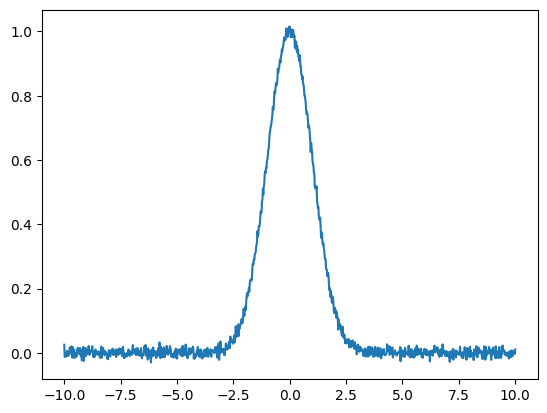

In [2]:
plot_gaussians(1000, 0, 1, 0.01)

In [4]:
# checking auto-corelation and cross-corelation between the generated gaussian curve and itself.
def auto_correlation(num_points, mean, std_dev, noise_level,seed):
    x, y = generate_gaussian_curve_with_noise(num_points, mean, std_dev, noise_level,seed)
    auto_corr = np.correlate(y, y, mode='full')
    plt.plot(auto_corr)
    plt.title("Auto-correlation")
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.show()
def cross_correlaiton(y,y2):
    # x, y = generate_gaussian_curve_with_noise(num_points, mean, std_dev, noise_level)
    # x, y2 = generate_gaussian_curve_with_noise(num_points, mean, std_dev, noise_level)
    cross_corr = np.correlate(y, y2, mode='full')
    plt.plot(cross_corr)
    plt.title("Cross-correlation")
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.show() 

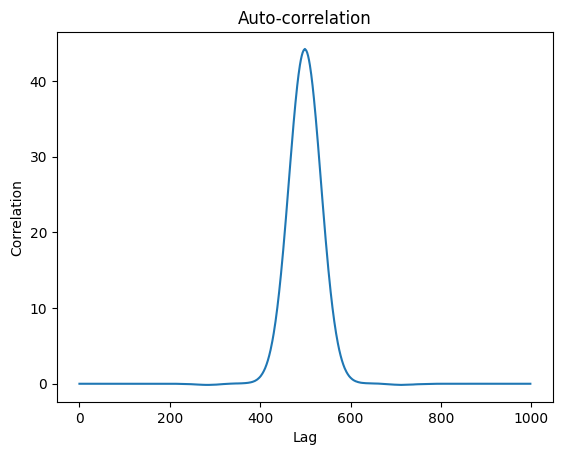

In [5]:
auto_correlation(500, 0, 1, 0.01,42)
# why is it showing a dependence on the number of points?
# happens beacuse the auto-correlation would happen in fourier domani, and that oeuld actually generate 2N points, so the final lag is a funciton of N points. 

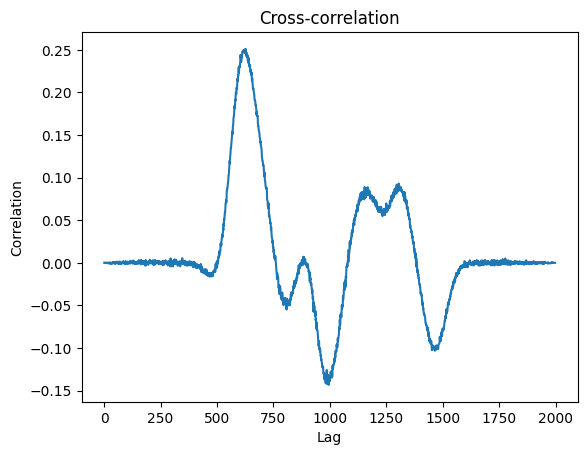

In [13]:
x,y=generate_gaussian_curve_with_noise(1000, 0, 1, 0.01)
x,y2=generate_gaussian_curve_with_noise(1000,-20,1,0.01,42)
cross_correlaiton(y,y2)
# the peak shifts, to right when one of the gaussians
# have a negative mean and to the left when one of the gaussians have a positive mean, for only finite
# values of lags, the peak is at the mean difference of the two gaussians, when mean is incresed, then we see multiple peaks.

In [14]:
# fft and cross-correlation(convoultion), packing, unapcking and then, false detection  probability, to minimize false correlation between gaussian.
# longss-karggle period algortihm.(btter htan fft.)

https://chatgpt.com/share/67ae5141-f6d8-8012-a554-3019dbed4799 - link to the chat

Here’s the intuition behind using **FFT** and **convolution** for finding correlations between signals:

### **FFT**:
- When signals are periodic or have repeating patterns, these patterns can be better understood in the frequency domain.
- **Frequency Domain Insight**: FFT transforms signals into frequencies, making it easier to spot how similar frequencies (patterns) between two signals align or differ.
- **Cross-correlation via FFT**: By multiplying the frequency components of one signal with the conjugate of the other, you essentially measure how well the signals "match" across all frequencies. The inverse FFT then converts this information back to the time domain, showing how the two signals align or differ over time (i.e., correlation).

### **Convolution**:
- **Convolution** measures how much one signal overlaps with a time-shifted version of another signal. Imagine sliding one signal over another and recording how well they align at each step.
- **Why it works**: If two signals are similar, shifting one over the other (convolution) will result in a high output when they are aligned. This reveals similarities and time lags between the signals.
  
### Key Idea: Both methods explore how signals **align** with each other, either in time (convolution) or in frequency (FFT cross-correlation), making them useful for detecting similarities and patterns.


To see the correlation between signals using **FFT** and **convolution**:

1. **FFT**:
   - **Cross-correlation** between two signals can be computed using FFT. The correlation is done by multiplying the FFT of one signal with the complex conjugate of the FFT of the other signal, then applying an inverse FFT.
   - This method is efficient for large datasets and helps identify similarities (correlation) between signals in the frequency domain.
   
   **Formula**:
   $\text{Corr}(f,g) = \text{IFFT}(\text{FFT}(f) \times \text{FFT}^*(g))$,
   Where \( f \) and \( g \) are the two signals, and \( * \) is the complex conjugate.

2. **Convolution**:
   - Convolution of two signals is mathematically equivalent to cross-correlation but with one signal reversed. It gives insight into how much one signal overlaps with a time-shifted version of another signal, indicating their correlation.
   
   **Key insight**: Convolution and correlation help in detecting time lags, phase shifts, and similarity between signals.

**False detection probability (FDP)** refers to the probability that a detected signal or event is actually **false**, meaning it is not a true signal but rather a result of noise, random fluctuations, or other errors in the data.

In other words, it measures the likelihood that a detection (e.g., in signal processing, statistical analysis, or astrophysics) is a **false positive**.

### Example in signal detection:
- If you are searching for pulsar signals and detect a signal, the false detection probability tells you how likely it is that this detected signal is just noise rather than a real pulsar signal.

A **low FDP** means there’s a high confidence that the detection is real, while a **high FDP** suggests a greater chance of the detection being spurious.